# 똑같은 코드들

## data: hi?hello!!

In [93]:
def f(txt,mapping):
    return [mapping[chr] for chr in txt]

In [94]:
import torch
txt = list("hi?hello!!") * 100
txt_x = txt[:-1]
txt_y = txt[1:]

In [95]:
mapping = {"!" : 0 ,"?" : 1,"h" : 2, "i" : 3,"e" : 4,"l" : 5, "o" : 6}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")
print(len(mapping))

7


## 초깃값 h_0,c_0는 생략이 가능하다.

`-` 코드1 : 정석코드

In [96]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [97]:
_h0 = _c0 = torch.zeros(1,4).to("cuda:0")
lstm(x,(_h0,_c0))

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드2 : 초깃값이 없는 코드(c0,h0는 사실 없어도 무방함)
`-` 알아서 차원맞춰서 잘 초기화 해줘요.

In [98]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [99]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

## 세트2: x.shape = ($L$,$H_{in}$) or ($L$,$N$,$H_{in}$)

`-` timeseiries와 RNN<br>
timeseries 데이터는 시점(timestep)에 따라서 그 값들이 정렬된 데이터입니다. 각 시점에서의 값들은 서로 연관되어 있습니다. 하나의 timeseries 데이터를 RNN계열의 모형에 입력하면 각 시점에서 값을 재귀적으로 읽어서 $\hat{y}$를 출력합니다.
`-` 파라미터 설명<br>
- $L$ : sequnce length = timestep(시점)의 총 갯수 = timestp의 길이 = 시계열 데이터의 길이
- $H_{in}$ : each timestep(시점)에 들어오는 입력백터의 길이, 입력시계열이 시점별로 몇개의 변수로 나타내어 지는가?,만약에 원핫인코딩으로 정리하면 단어수를 의미함,시점마다 길이는 모두 같음(전처리 과정에서 길이를 같게해주기 때문)
- $N$ : 전체 데이터를 몇개의 시계열(묶음)데이터 인지? = 전체데이터 안에 있는 시계열데이터 묶음의 갯수 = 전체데이터의 미니배치의 갯수, 예를들어 (1000,7)의 shape을 가진 시계열데이터를 2개의 묶음으로 나눈다면 N = batch size = 2,왜 쪼개는지는 나중에 ... 공부

`-` 코드3 : x의 차원은 사실 엄밀하게는 ($L$,$N$,$H_{in}$)이다.

In [100]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda")

In [101]:
lstm(x.reshape(999,1,7)) #전체데이터를 쪼개지 않았으므로 즉 묶음은 1개뿐이므로 N = 1

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 코드4 : `batch_first = True`일 경우 차원은 ($N$,$L$,$H_{in}$)이다.

In [102]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4,batch_first = True).to("cuda")
lstm(x.reshape(1,999,7)) #전체데이터를 쪼개지 않았으므로 즉 묶음은 1개뿐이므로 N = 1

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563],
          [-0.0786, -0.1430, -0.0250,  0.1189],
          [-0.0300, -0.2256, -0.1324,  0.1439],
          ...,
          [-0.0723,  0.0620,  0.1913,  0.2015],
          [-0.1155,  0.0746,  0.1747,  0.2938],
          [-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

## 세트3 : hidden.shape = ($D \times$ `num_layers`,$H_{out}$) or ($D \times$`num_layers`,$N$,$H_{out}$)
네트워크에 우리는 h_0,c_0를 넣었었다.그때 h_0.shape = c_0.shape = (1,$H_{out}$)이었는데 여기서 사실은 1은 $D \times `num_layers`$입니다. 우리는 1개의 히든레이어를 가진 LSTM이므로 `num_layers`= 1 따라서 1이었습니다.<br>

`-`파라미터 설명<br>
- $D$ = 2 if bidirectional = True otherwise = 1 (양방향이면2 단방향이면1,우리는 단방향만 써왔으므로 $D$ = 1)
- `num_layers` = 히든레이어가 1개 이상인 경우(중첩된 RNN)
- $H_{out}$ = 히든노드의 수
- $N$ : 전체시계열 데이터안에 있는 묶음의 갯수 = 전체데이터 안에 있는 시계열데이터 묶음의 갯수 = 전체데이터의 미니배치의 갯수, 미니배치안에 있는 원소들의 갯수가 아님 !! 예를들어 (1000,7)의 shape을 가진 시계열데이터를 2개의 묶음으로 나눈다면 N = batch size = 2,왜 쪼개는지는 나중에 ... 공부

`-`코드5<br>
`-` x.shape = $(1,H_{in}) \to $ x.shape = $(L,1,H_{in})$<br>
`-` h.shape = $(1,H_{out}) \to $ h.shape = $(1,1,H_{out})$

In [103]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [104]:
#엄밀한 방식
_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")
lstm(x.reshape(999,1,7),(_h0.reshape(1,1,4),_c0.reshape(1,1,4)))

#엄밀한 방식2
_h0 = _c0 = torch.zeros(1,1,4).to("cuda:0")
lstm(x.reshape(999,1,7),(_h0,_c0))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 사실 _h0.shape= _c0.shape = ($1,H_{out}$)에서 1은 $D \times$ `numlayers`입니다.<br>
- 만약 은닉계층의 수가 1개인 lstm이라면 _h0.shape = _c0.shape = $(1,H_{out})$
- 만약 은닉계층의 수는 1개,양방향 lstm이라면 _h0.shape = _c0.shape = $(2,H_{out})$
- 만약 은닉계층의 수가 3개인 (단방향)lstm이라면 _h0.shape = _c0.shape = $(3,H_{out})$
- 만약 은닉계층의 수가 3개,양방향 lstm이라면 _h0.shape = _c0.shape = $(6,H_{out})$

# 똑같은 코드들 torch.nn.lstm_cell

`-` 코드1 : 정석코드

In [105]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [106]:
xt = x[[1]] #임의의 t시점(여기서는 t=1)에서의 데이터를 받고
_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")#초기 h0,c0를 만들고
xt.shape,_h0.shape,_c0.shape

(torch.Size([1, 7]), torch.Size([1, 4]), torch.Size([1, 4]))

In [107]:
lstmcell(xt,(_h0,_c0)) #임의의 시점에서의 값,초깃값들을 넣어줌

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드2 : 초깃값 생략 코드

In [108]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [109]:
xt = x[[1]] #임의의 t시점(여기서는 t=1)에서의 데이터를 받고
#_h0,_c0 = torch.zeros(1,4).to("cuda:0"),torch.zeros(1,4).to("cuda:0")#초기 h0,c0를 만들고
xt.shape#,_h0.shape,_c0.shape

torch.Size([1, 7])

In [110]:
lstmcell(xt) #임의의 시점에서의 값만 넣어줌

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

## 세트2 : xt.shape = $(N,H_{in}) or (H_{in})$

`-`코드2:초깃값 생략

In [111]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda")

In [112]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [113]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

-코드3:간단한 shape 사용

In [114]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [115]:
xt = x[1]
xt.shape #위의 shape과 다른것을 확인

torch.Size([7])

In [116]:
lstmcell(xt)

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

##

## 세트3 : hidden.shape = $(N,H_{out})$ or $(H_{out})$

`-` 코드4<br>
xt.shape = $(1,H_{in}) \to (H_{in})$<br>
ht.shape = $(1,H_{out}) \to (H_{out})$<br>
더 간단한 차원을 가진 텐서를 입력으로 해도 무방하다.

In [117]:
torch.manual_seed(43052)
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0")

In [118]:
xt = x[1]
_h0,_c0 = torch.zeros(4).to("cuda"),torch.zeros(4).to("cuda")
xt.shape,_h0.shape,_c0.shape

(torch.Size([7]), torch.Size([4]), torch.Size([4]))

In [119]:
lstmcell(xt,(_h0,_c0))

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

# 요약

## 똑같은 코드들 정리
`-` 1은 단순한 observation의 차원이 아니다.
`-` 네트워크가(1) 단방향 (2)배치가없는(조각이 없는) (3)중첩하지 않은(다계층이 아닌) 순환망에 한해서는 observation 처럼 생각해도 무방하다. --> 엄밀하게는 위험한 생각입니다.

## 실제구현시
`-` 현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이 없다. (느립니다.단지 이해용)<br>
`-` torch.nn.RNN or torch.nn.LSTM으로 네트워크를 구성할 시 _h0,_c0의 dim을 명시할 일도 없다.<br>
`-` 입력시계열데이터를 배치로 나누는 경우에 대한 개념만 명확하게 잡으면 된다.배치로 나눌지 말지 나누면 어떻게 되고 안나누면 어떻게 되는지 명확하게 알자.

# 배치사이즈가 1이 아닐경우(조각난 경우)의 학습

# data

In [120]:
txt = list("hi!")* 3 + list("hi?") * 3
txt

['h',
 'i',
 '!',
 'h',
 'i',
 '!',
 'h',
 'i',
 '!',
 'h',
 'i',
 '?',
 'h',
 'i',
 '?',
 'h',
 'i',
 '?']

## 조각내지 않은 시계열 데이터(배치가 없는 시계열 데이터)

In [121]:
txt_x = txt[:-1]
txt_y = txt[1:]
mapping = {"!": 0 ,"?":1 , "h":2 ,"i" : 3}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda")
print(x.shape)

torch.Size([17, 4])


In [122]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters()) + list(linr.parameters()))

In [123]:
for epoch in range(1000):
    ## 1
    hidden,(h_T,c_T) = lstm(x)
    #hidden은 가장 깊이 있는 은닉계층의 모든 시점에서 output이므로 hidden.shape = (17,10)
    #h_T,c_T는 모든 은닉계층에서 마지막 시점에서 output이므로 h_T(c_T).shape = c_T.shape = (1,10)
    print(hidden.shape,h_T.shape,c_T.shape)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4
    optimizer.step()
    optimizer.zero_grad()

torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) tor

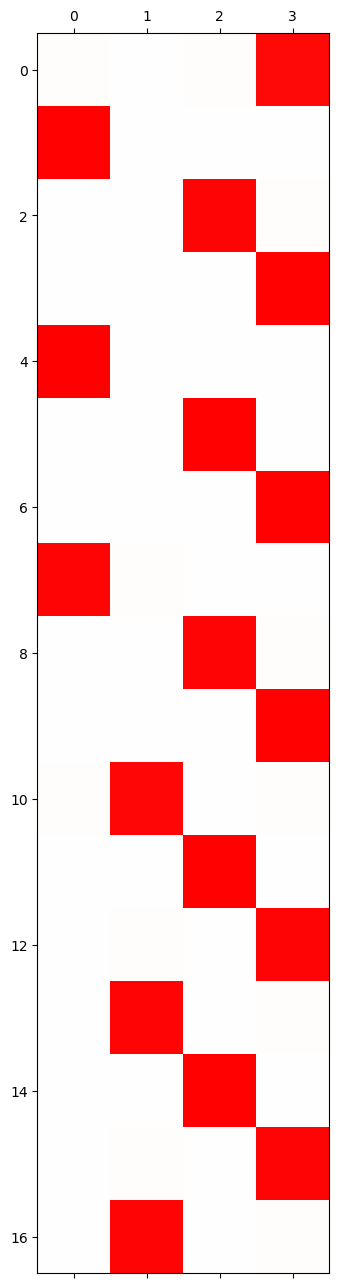

In [124]:
import matplotlib.pyplot as plt
soft = torch.nn.Softmax(dim=1)
plt.matshow(soft(output).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

## 조각낸 시계열 데이터(배치가 있는 경우의 시계열 데이터)

In [125]:
txt1 = txt[:9]
txt2 = txt[9:]

In [141]:
txt1_x = txt1[:-1]
txt1_y = txt1[1:]
txt2_x = txt2[:-1]
txt2_y = txt2[1:]

In [142]:
mapping = {"!":0,"?":1,"h":2,"i":3}
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda")

In [147]:
x1.shape,y1.shape,x2.shape,y2.shape

(torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]))

In [162]:
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)
xx.shape,yy.shape

(torch.Size([8, 2, 4]), torch.Size([8, 2, 4]))

In [165]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()))

In [166]:
hidden, _ = lstm(xx)
hidden.shape

torch.Size([8, 2, 10])

In [ ]:
for epoch in range(1000):
    ## 1
    hidden,(h_T,c_T) = lstm(xx)
    #hidden은 가장 깊이 있는 은닉계층의 모든 시점에서 output이므로 hidden.shape = (17,10)
    #h_T,c_T는 모든 은닉계층에서 마지막 시점에서 output이므로 h_T(c_T).shape = c_T.shape = (1,10)
    print(hidden.shape,h_T.shape,c_T.shape)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4
    optimizer.step()
    optimizer.zero_grad()

torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) torch.Size([1, 10]) torch.Size([1, 10])
torch.Size([17, 10]) tor